## Spot Analysis of BF Correction

Originally written by Alex Broughton



In [2]:
! eups list -s | grep lsst_distrib

eups                  LOCAL:/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2022_14/conda/envs/lsst-scipipe-3.0.0-ext/eups 	setup
lsst_distrib          g4eaec17cb9+23bdaa02ee 	w_latest w_2022_14 current setup


In [3]:
import os
import numpy as np
import glob
from astropy.io import fits
import pickle as pkl
import matplotlib.pyplot as plt
from lsst.daf.butler import Butler
import lsst.afw.display as afwDisplay
import lsst.afw.image as afwImage
from lsst.obs.lsst import LsstCam
from lsst.afw.cameraGeom.utils import findAmp
from lsst.geom import Point2I
from astropy.table import Table, vstack, join
from scipy import stats
from scipy.optimize import curve_fit
import logging
from matplotlib.colors import LogNorm


logging.basicConfig()
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

repo = "/sdf/group/lsst/camera/IandT/repo_gen3/BOT_data/butler.yaml"

butler = Butler(repo)
registry = butler.registry

#### Plot example image

In [4]:
subbutler = Butler(repo, collections="u/snyder18/spot_13237/characterize_spots")
subregistry = subbutler.registry


datasetRefs  = list(subregistry.queryDatasets(datasetType="postISRCCD"))
aref = datasetRefs[17]


# Get the raw image
#raw = subbutler.get("raw",dataId=aref.dataId)
#md = raw.getMetadata()
#sensor = md["RAFTBAY"] + "_" + md["CCDSLOT"]
#seqnum = md["SEQNUM"]
#tseqnum = md["TSEQNUM"]
#exptime = md["EXPTIME"]
#time = md["MJD"]
#botx,boty = md["BOTX"], md["BOTY"]

# get raw
raw = subbutler.get("raw",dataId=aref.dataId)
print(raw.getMetadata()["EXPTIME"])

# get the postisr image
postisr = subbutler.get("postISRCCD",dataId=aref.dataId)
image = postisr.getImage().getArray()


src = subbutler.get("spotSrc",dataId=aref.dataId)
spot = 1200
x = src[spot+1]["base_SdssCentroid_x"]
y = src[spot+1]["base_SdssCentroid_y"]

10.0


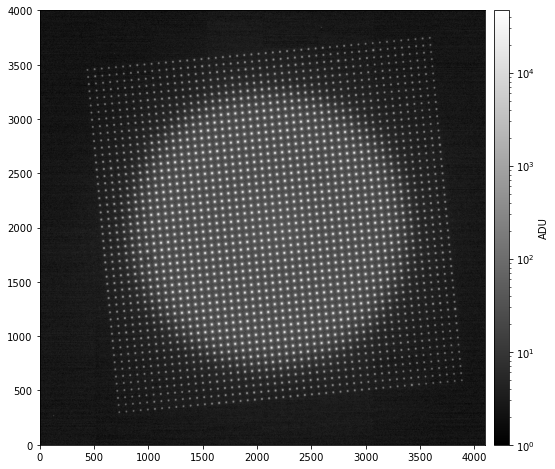

In [5]:
fig = plt.figure(figsize=(10,8), facecolor="w")
from scipy.ndimage import gaussian_filter
image[np.where(image < 0)] = 0
im = plt.imshow(image,cmap="gray",origin="lower",norm=LogNorm(vmin=1,vmax=np.max(image)))
#plt.plot(x,y,"ro")
cbar_ax = fig.add_axes([0.835, 0.125, 0.02, 0.755])
cbar = plt.colorbar(im, cax=cbar_ax, label="ADU")
plt.savefig("../plots/example_image.png", bbox_inches='tight')

In [5]:
subbutler = Butler(repo, collections="u/snyder18/spot_13237/gridcalibration")
subregistry = subbutler.registry


datasetRefs  = list(subregistry.queryDatasets(datasetType="gridCalibration"))
#aref = datasetRefs[17]
print(len(datasetRefs))

# Get the raw image
#raw = subbutler.get("raw",dataId=aref.dataId)
#md = raw.getMetadata()
#sensor = md["RAFTBAY"] + "_" + md["CCDSLOT"]
#seqnum = md["SEQNUM"]
#tseqnum = md["TSEQNUM"]
#exptime = md["EXPTIME"]
#time = md["MJD"]
#botx,boty = md["BOTX"], md["BOTY"]

# get raw
raw = subbutler.get("raw",dataId=aref.dataId)
print(raw.getMetadata()["EXPTIME"])

# get the postisr image
postisr = subbutler.get("postISRCCD",dataId=aref.dataId)
image = postisr.getImage().getArray()


src = subbutler.get("spotSrc",dataId=aref.dataId)
spot = 1200
x = src[spot+1]["base_SdssCentroid_x"]
y = src[spot+1]["base_SdssCentroid_y"]

MissingCollectionError: No collection with name 'u/snyder18/spot_13237/gridcalibration' found.